In [1]:
!python --version

Python 3.11.7


In [3]:
# Import Libraries 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Change setting in pandas to display all columns
pd.options.display.max_columns = None

In [5]:
# Import medical dataset
medicalDF =pd.read_csv(r"C:\Users\ashle\Desktop\MSDA WGU\Predictive Modeling - D208\Data Set\medical_clean.csv")

In [7]:
medicalDF

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,Rural,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


## Data Exploration

In [9]:
# Printing a summary of the independent continuous variables used.
summary = medicalDF[['Income']].describe()
print(summary)

              Income
count   10000.000000
mean    40490.495160
std     28521.153293
min       154.080000
25%     19598.775000
50%     33768.420000
75%     54296.402500
max    207249.100000


In [11]:
# Summary for categorical variables
# Print the percentage of each value for all qualitative variables.
categoricalCols = ['Initial_admin', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Asthma', 'ReAdmis', 'Anxiety']
for i in categoricalCols:
    percentage = medicalDF[i].value_counts(normalize=True) * 100
    print(percentage.round(2).astype(str) + '%')

Initial_admin
Emergency Admission       50.6%
Elective Admission       25.04%
Observation Admission    24.36%
Name: proportion, dtype: object
Stroke
No     80.07%
Yes    19.93%
Name: proportion, dtype: object
Complication_risk
Medium    45.17%
High      33.58%
Low       21.25%
Name: proportion, dtype: object
Arthritis
No     64.26%
Yes    35.74%
Name: proportion, dtype: object
Diabetes
No     72.62%
Yes    27.38%
Name: proportion, dtype: object
Hyperlipidemia
No     66.28%
Yes    33.72%
Name: proportion, dtype: object
Asthma
No     71.07%
Yes    28.93%
Name: proportion, dtype: object
ReAdmis
No     63.31%
Yes    36.69%
Name: proportion, dtype: object
Anxiety
No     67.85%
Yes    32.15%
Name: proportion, dtype: object


## Univariate Visuals

C:\Users\ashle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


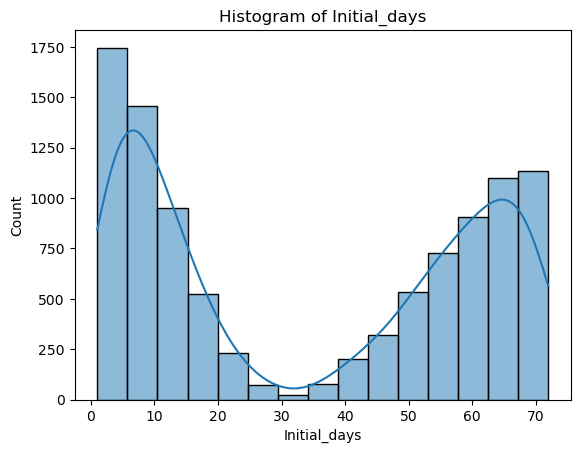

C:\Users\ashle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


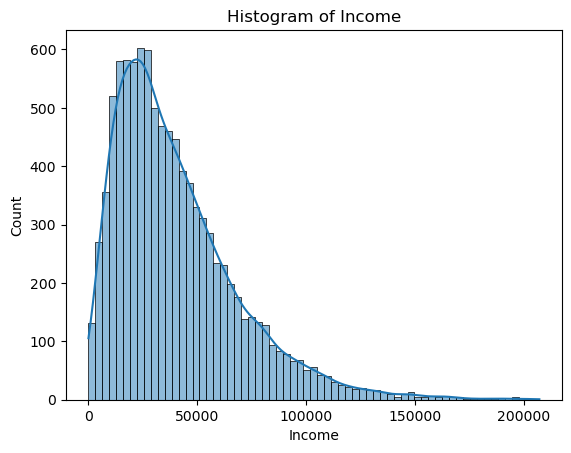

In [13]:
#Printing a Histogram for each qualitative variable
column_qual = ['Initial_days', 'Income']

for col in column_qual:
    sns.histplot(medicalDF[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

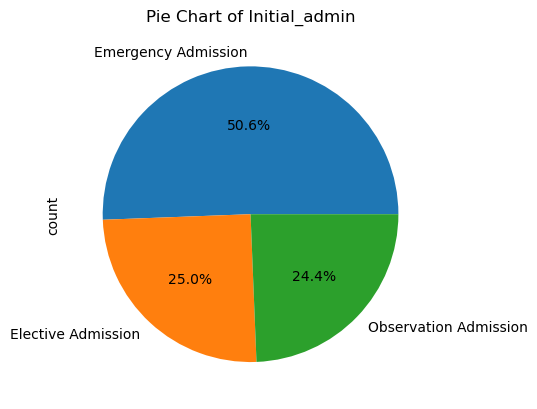

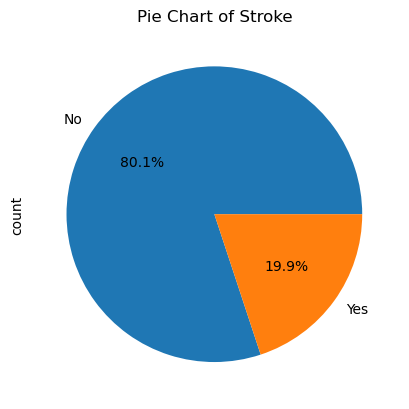

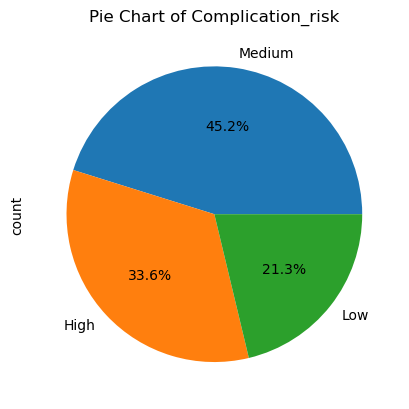

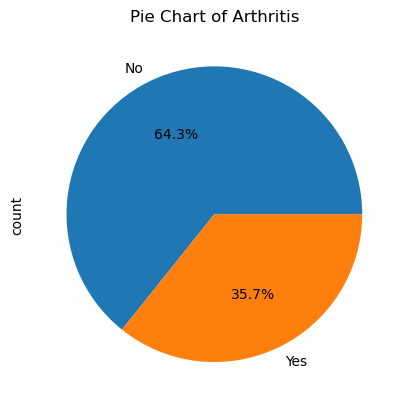

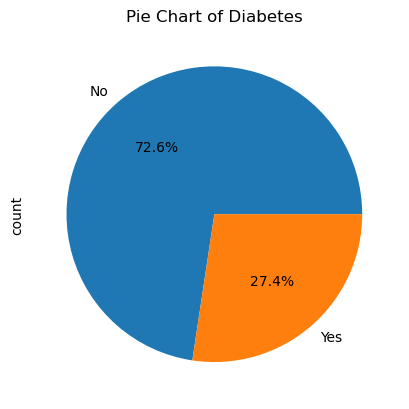

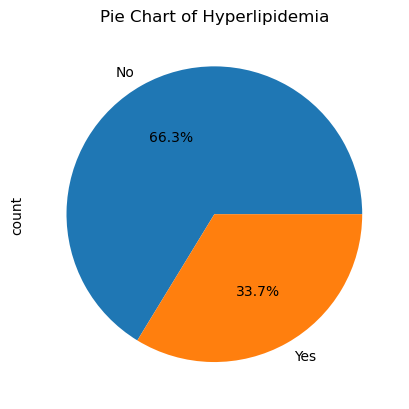

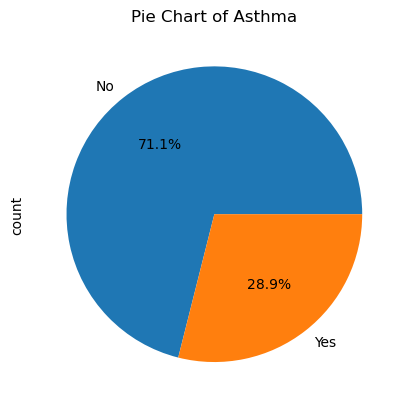

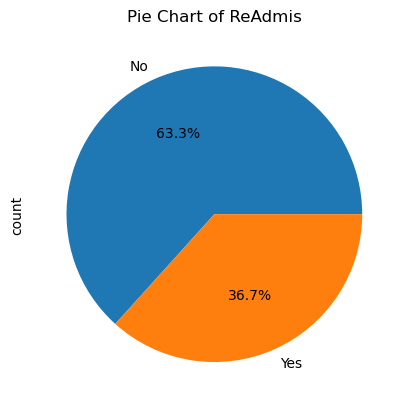

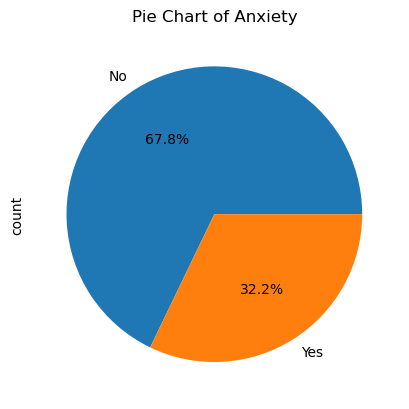

In [15]:
#Printing a pie chart for each quantitative variable
columns_quan = ['Initial_admin', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Asthma', 'ReAdmis', 'Anxiety']

for col in columns_quan:
    medicalDF[col].value_counts().plot(kind='pie', autopct='%1.1f%%') 
    plt.title(f'Pie Chart of {col}')
    plt.show()

## Bivariate Visuals

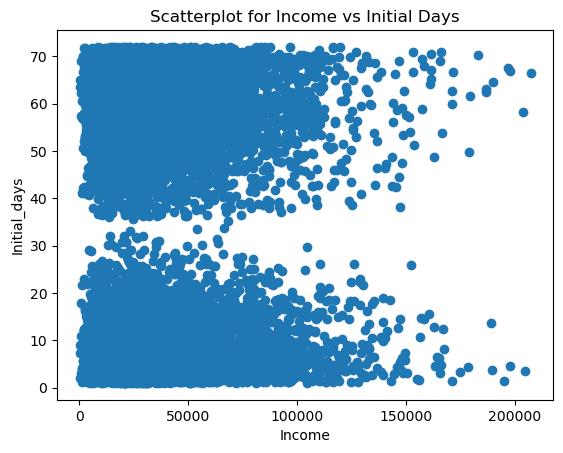

In [17]:
#Scatterplot for target (qualitative variable) vs the qualitative variable
columns = ['Income']

for col in columns:
    plt.scatter(medicalDF[col], medicalDF['Initial_days'])
    plt.title(f'Scatterplot for {col} vs Initial Days')
    plt.xlabel(col)
    plt.ylabel('Initial_days')
    plt.show()

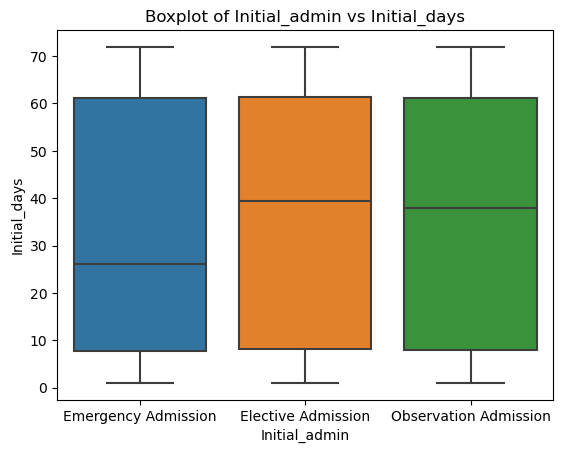

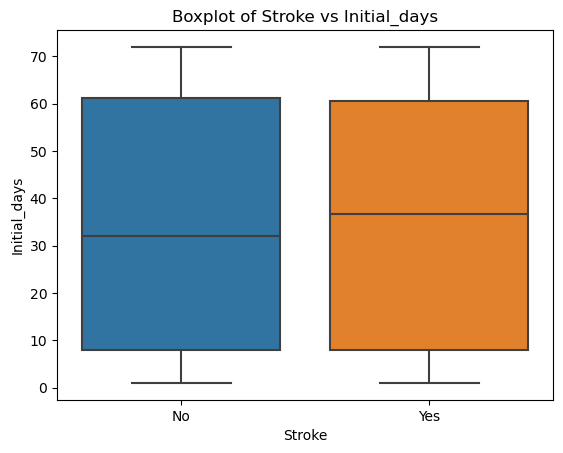

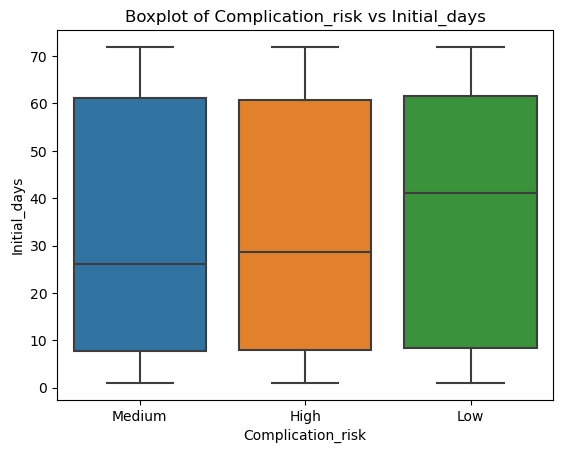

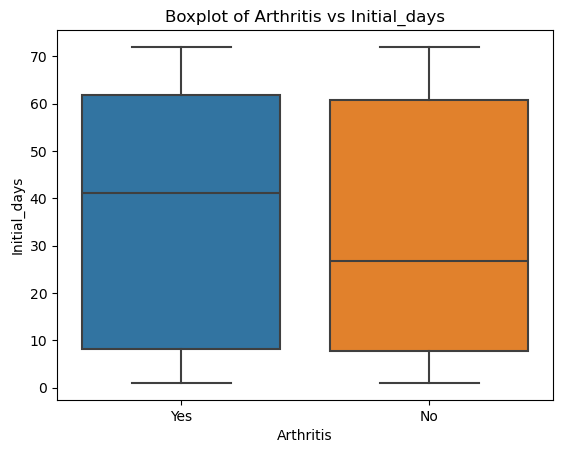

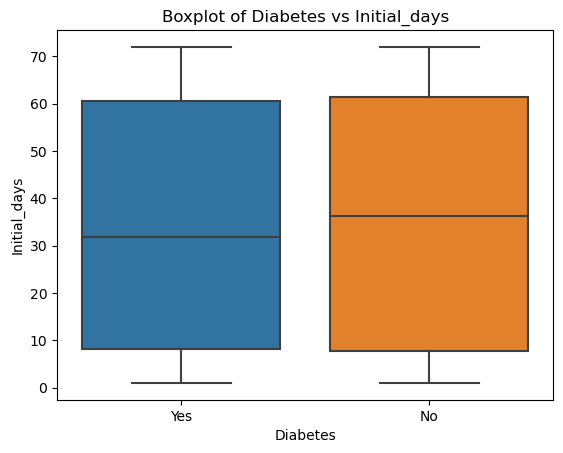

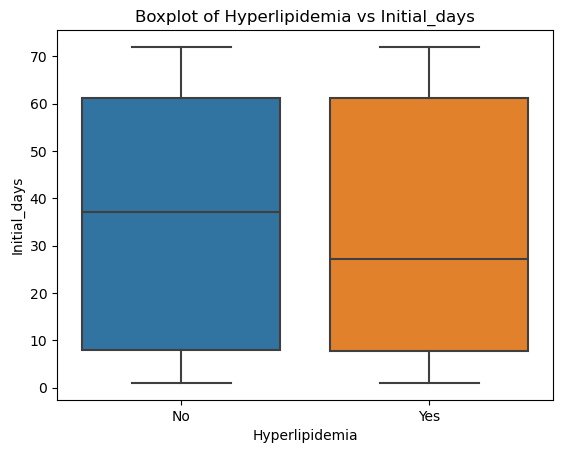

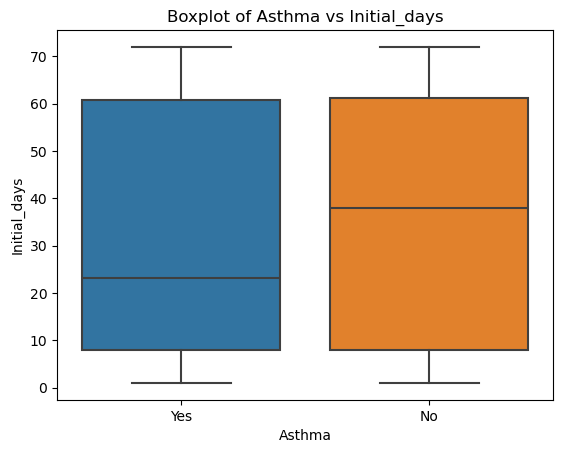

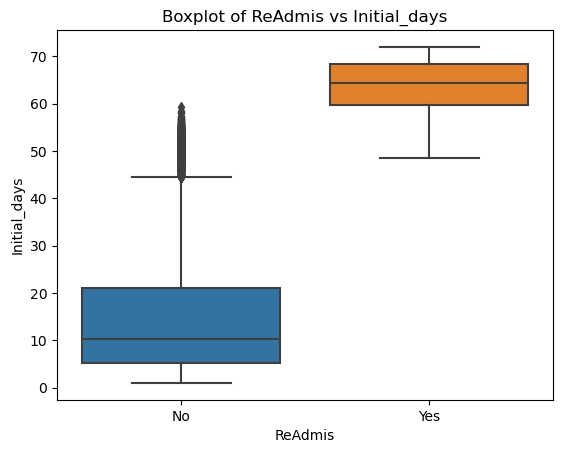

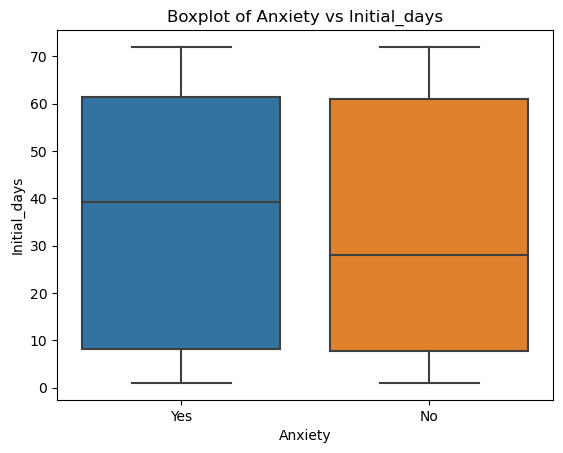

In [19]:
# Create a boxplot for the target (qualitative variable) vs the quantitative variables.
for col in columns_quan:
    sns.boxplot(x=col, y='Initial_days', data=medicalDF)
    plt.title(f'Boxplot of {col} vs Initial_days')
    plt.show()

## Data Cleaning

In [21]:
# Create a copy of the data frame for cleaning the data.
medicalClean = medicalDF.copy()

In [23]:
# Indentify duplicates 
duplicates = medicalClean[medicalClean.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, UID, City, State, County, Zip, Lat, Lng, Population, Area, TimeZone, Job, Children, Age, Income, Marital, Gender, ReAdmis, VitD_levels, Doc_visits, Full_meals_eaten, vitD_supp, Soft_drink, Initial_admin, HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma, Services, Initial_days, TotalCharge, Additional_charges, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []


In [25]:
# Identify null values in the dataframe.
missingValues = medicalClean.isnull().sum().sum()
print(missingValues)

0


In [27]:
#Identifying Outliers
#Define column variable with all the numeric columns in the data frame
columns = ['Lat', 'Lng', 'Children', 'Age', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Population', 'Income']
print("\n\n\033[1m Count of Outliers: ")
#Loop through each numeric column to find outliers
for i in columns:
    #print(")
    # Calculating the first quartile, the third quartile, and the interquartile range. [In-Text Citation: (Hackers Realm)]
    Q1 = medicalClean[i].quantile(0.25)
    Q3 = medicalClean[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    # Identify outliers
    outliers = medicalClean[(medicalClean[i] < lower_bound) | (medicalClean[i] > upper_bound)]
    #Printing the count and range of outliers
    print("\n\033[1m " + i + ": \033[0m" + "Count of outliers: " + str(len(outliers)))


# Cleaning Outliers
# Z-score capping to cap all columns with outliers with a threshold set at 3 standard deviations from the mean. 
outlierColumns = ['Lat', 'Lng', 'Children', 'VitD_levels', 'Full_meals_eaten', 'vitD_supp', 'Population', 'Income']
print("\n\n\033[1m Upper and Lower Threshold for Each Column: ")
# Loop through each column that has outliers.
for i in outlierColumns: 
    # Calculate the upper and lower threshold using the Interquartile Range (IQR) method. 
    upperThreshold = medicalClean[i].mean() + 3*medicalClean[i].std()
    lowerThreshold = medicalClean[i].mean() - 3*medicalClean[i].std()
    #Print upper and lower threshold for each column
    print("\n\033[1m" + i + ": \033[0m Upper: " + str(upperThreshold) + ' Lower: ' + str(lowerThreshold))
    
    #Capping outliers for each column on upper and lower limit
    medicalClean.loc[(medicalClean[i]>=upperThreshold), i] = int(upperThreshold)
    medicalClean.loc[(medicalClean[i]<=lowerThreshold), i] = int(lowerThreshold)

# Print a count of outliers after cleaning.
print("\n\n\033[1m Count of Outliers After Cleaning: ")
for i in columns:   
    outliers_ = medicalClean[(medicalClean[i] < lowerThreshold) | (medicalClean[i] > upperThreshold)]
    print("\n\033[1m " + i + ": \033[0m" + "Count of Outliers: " + str(len(outliers_)))


    



 Count of Outliers: 

 Lat: Count of outliers: 150

 Lng: Count of outliers: 237

 Children: Count of outliers: 411

 Age: Count of outliers: 0

 VitD_levels: Count of outliers: 60

 Doc_visits: Count of outliers: 0

 Full_meals_eaten: Count of outliers: 8

 vitD_supp: Count of outliers: 70

 Population: Count of outliers: 855

 Income: Count of outliers: 326


 Upper and Lower Threshold for Each Column: 

Lat:  Upper: 54.96035457062313 Lower: 22.541842743376883

Lng:  Upper: -45.62508628113814 Lower: -136.86107321886186

Children:  Upper: 8.58817702339697 Lower: -4.39377702339697

VitD_levels:  Upper: 24.015954780441817 Lower: 11.912568529284187

Full_meals_eaten:  Upper: 4.0257506790224005 Lower: -2.0229506790224008

vitD_supp:  Upper: 2.2844144195850116 Lower: -1.4866144195850117

Population:  Upper: 54439.52964287172 Lower: -34509.02204287172

Income:  Upper: 126053.95503955189 Lower: -45072.964719551885


 Count of Outliers After Cleaning: 

 Lat: Count of Outliers: 0

 Lng: Cou

## Data Wrangling

In [29]:
# Re-express all yes/no categorical variables to be expressed as 1/0.
# Create a variable for categorical columns that need to be replaced.
yes_no_Columns = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                      'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Overweight', 'Anxiety']
# Loop through each column and use replace to change yes/no values to 1/0.
for i in yes_no_Columns:
        medicalClean[i].replace(to_replace =['Yes','No'], value = [1,0], inplace = True)

# Re-express initial admin reasons and complication risk level to be expressed numerically.
label_encoder = LabelEncoder()
encodedLabelsInitialAdmin = label_encoder.fit_transform(medicalClean['Initial_admin'])
medicalClean['Initial_admin'] = encodedLabelsInitialAdmin
encodedLablesCompRisk = label_encoder.fit_transform(medicalClean['Complication_risk'])
medicalClean['Complication_risk'] = encodedLablesCompRisk



In [31]:
# Creating a data frame with columns used in the initial model
columns = ['Initial_days', 'Income', 'Initial_admin', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Asthma', 'ReAdmis', 'Anxiety']
modelData = medicalClean[columns]

In [33]:
modelData

,Initial_days,Income,Initial_admin,Stroke,Complication_risk,Arthritis,Diabetes,Hyperlipidemia,Asthma,ReAdmis,Anxiety
0,10.585770,86575.93,1,0,2,1,1,0,1,0,1
1,15.129562,46805.99,1,0,0,0,0,0,0,0,0
2,4.772177,14370.14,0,0,2,0,1,0,0,0,0
3,1.714879,39741.49,0,1,2,1,0,0,1,0,0
4,1.254807,1209.56,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,51.561220,45967.61,1,0,2,0,0,0,0,0,1
9996,68.668240,14983.02,0,0,2,1,1,0,1,1,0
9997,70.154180,65917.81,0,0,0,0,0,0,0,1,1
9998,63.356900,29702.32,1,0,2,0,0,0,0,1,0


In [35]:
# Export cleaned data
modelData.to_csv(r'C:\Users\ashle\Desktop\MSDA WGU\Predictive Modeling - D208\PA task 1 Python\Cleaned dataset\Medical_Cleaned.csv')

## Multicollinearity Check

In [37]:
# Values above 10 (or 5) suggest high multicollinearity.
# Checking for multicollinearity using variance inflation Factor (VIf)
X = modelData[['Income', 'Initial_admin', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Asthma', 
               'ReAdmis', 'Anxiety']] 
vif_data = pd.DataFrame() 
vif_data["Variable"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            Variable       VIF
0             Income  2.467622
1      Initial_admin  2.426295
2             Stroke  1.215017
3  Complication_risk  2.222618
4          Arthritis  1.474117
5           Diabetes  1.325700
6     Hyperlipidemia  1.433073
7             Asthma  1.352791
8            ReAdmis  1.482308
9            Anxiety  1.405114


## Initial Model

In [39]:
#Creating the initial model
independant = 'Income + Initial_admin + Stroke + Complication_risk + Arthritis + Diabetes + Hyperlipidemia + Asthma + ReAdmis + Anxiety'
dependant = 'Initial_days'
initial_model = ols(f"{dependant} ~ {independant}", data=modelData).fit()
print(initial_model.summary())

 # print adjusted coefficient of determination
rsquared_adj = initial_model.rsquared_adj
print(f'\n\033[1mAdjusted Coefficient of Determination: \033[0m{rsquared_adj}')

# print residual standard error
rse_length = np.sqrt(initial_model.mse_resid)
print(f'\n\033[1mResidual Standard Error: \033[0m{rse_length}')

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2625.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:05:50   Log-Likelihood:                -40445.
No. Observations:               10000   AIC:                         8.091e+04
Df Residuals:                    9989   BIC:                         8.099e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.5722      0.43

## Backward Stepwise Elimination - Reduced Model

In [41]:
# Define a function for backward stepwise elimination
def backwardElimination(data, target, alpha_to_remove=0.1):
    variables = list(data.columns)
    while len(variables) > 0:
        X = sm.add_constant(data[variables])
        # Fitting the model
        model = sm.OLS(target, X).fit()
        # Creating a variable with p values from the model
        p_values = model.pvalues.iloc[1:]
        # Identifying the maximum p-value
        max_p = p_values.max()
        # Loop through columns to eliminate the maximum p-value each time until the p-value is less and the significance level of 0.1.
        if max_p > alpha_to_remove:
            excluded_var = p_values.idxmax()
            # remove feature
            variables.remove(excluded_var)
            # printing what feature was removed and its p-value
            print(f"Removing {excluded_var}, p-value: {max_p}")
        else:
            break

    return model

X = modelData[['Income', 'Initial_admin', 'Stroke', 'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Asthma', 'ReAdmis',
                  'Anxiety']]
Y = modelData['Initial_days']

# Perform backward elimination
reduced_model = backwardElimination(X, Y)
print(reduced_model.summary())

# print adjusted coefficient of determination
rsquared_adj = reduced_model.rsquared_adj
print(f'\n\033[1mAdjusted Coefficient of Determination: \033[0m{rsquared_adj}')

# print residual standard error
rse_length = np.sqrt(reduced_model.mse_resid)
print(f'\n\033[1mResidual Standard Error: \033[0m{rse_length}')


Removing Diabetes, p-value: 0.975968304703658
Removing Asthma, p-value: 0.8410422055359302
Removing Income, p-value: 0.6929823664612735
Removing Stroke, p-value: 0.6243173905058623
Removing Initial_admin, p-value: 0.4906199475512958
Removing Complication_risk, p-value: 0.23712772316789557
Removing Hyperlipidemia, p-value: 0.1575920998845058
                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     8750.
Date:                Fri, 31 Jan 2025   Prob (F-statistic):               0.00
Time:                        12:06:07   Log-Likelihood:                -40447.
No. Observations:               10000   AIC:                         8.090e+04
Df Residuals:                    9996   BIC:                         8.093e+04
Df Model:                

## Model Comparison

In [43]:
# Print adjusted coefficient of determination for each model
r_squar_initial = initial_model.rsquared_adj
r_squar_reduced = reduced_model.rsquared_adj
print(f'\n\033[1mAdjusted Coefficient of Determination: \033[0m \n\tInitial Model:{r_squar_initial} \n\tReduced Model: {r_squar_reduced}')
print(f'\n\t Difference: {r_squar_reduced - r_squar_initial}')

# Print residual standard error for each model
rse_length_initial = np.sqrt(initial_model.mse_resid)
rse_length_reduced = np.sqrt(reduced_model.mse_resid)
print(f'\n\033[1mResidual Standard Error: \033[0m \n\tInitial Model: {rse_length_initial} \n\tReduced Model: {rse_length_reduced}')
print(f'\n\t Difference: {rse_length_initial - rse_length_reduced}')



Adjusted Coefficient of Determination:  
	Initial Model:0.7240561077299028 
	Reduced Model: 0.7241304840258929

	 Difference: 7.437629599005291e-05

Residual Standard Error:  
	Initial Model: 13.820392207894772 
	Reduced Model: 13.818529548702335

	 Difference: 0.0018626591924366664


## Residuals 

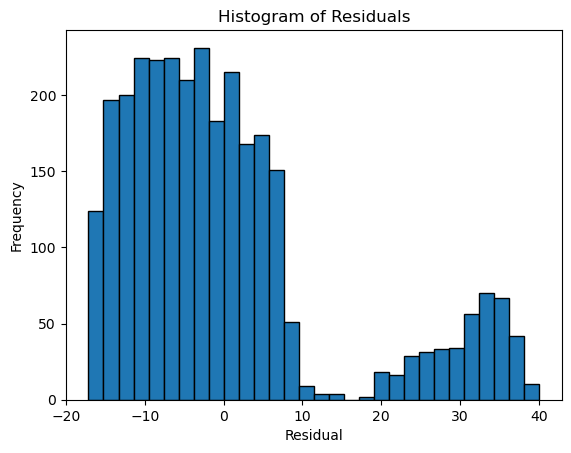

In [45]:
# Residual for reduced model

X = modelData[['Arthritis', 'ReAdmis', 'Anxiety']]
Y = modelData['Initial_days']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=34)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate residuals
residuals = y_test - predictions

# Create a histogram for the residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
